# **Mitigation Bias using Fairlet clustering**


## **Load the data**

In [1]:
# Imports
import numpy as np
import pandas as pd

#sys
import sys
sys.path.append('../../')

In [2]:
# Get data
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from tutorials.utils.datasets import preprocessed_dataset
from tutorials.utils.plotting import density_group_by_cluster

train_data , test_data = preprocessed_dataset('adult')

In [3]:
num = 10000
t_data = [np.array(d)[:num] for d in train_data]
X_train, _, group_a_train, group_b_train = t_data

In [4]:
from holisticai.bias.mitigation import FairKCenterClustering
import matplotlib.pyplot as plt 
from sklearn.preprocessing import StandardScaler
import pandas as pd

Xt = StandardScaler().fit_transform(X_train)

strategies = ['Fair K-Center', 'Heuristic Greedy by Group', 'Heuristic Greedy by Constraint']
models = []
for i,strategy in enumerate(strategies):
    model = FairKCenterClustering(req_nr_per_group=[200 , 200], nr_initially_given=100, strategy=strategy, seed=42)
    model.fit(Xt, group_a_train, group_b_train)
    models.append(model)    

c:\Users\Cristian\anaconda3\envs\metrics\lib\site-packages\tqdm\auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [5]:
costs = [{'Strategy':strategies[i], 'Cost':model.cost } for i,model in enumerate(models)]
pd.DataFrame(costs)

,Strategy,Cost
0,Fair K-Center,26.967451
1,Heuristic Greedy by Group,25.770199
2,Heuristic Greedy by Constraint,23.986552


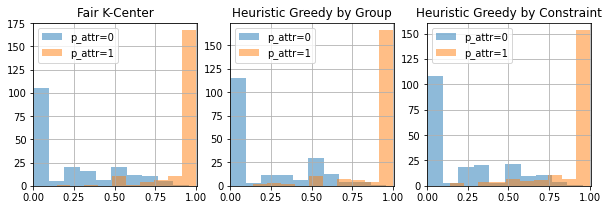

In [6]:
plt.figure(figsize=(10,3))
for i,model in enumerate(models):
    plt.subplot(1,3,i+1)
    plt.title(strategies[i])
    density_group_by_cluster(model, group_a_train)

In [7]:
from holisticai.bias.mitigation import FairKCenterClustering
from holisticai.pipeline import Pipeline
import matplotlib.pyplot as plt 
import pandas as pd

model = FairKCenterClustering(req_nr_per_group=[200 , 200], nr_initially_given=100, strategy='Fair K-Center', seed=42)

pipeline = Pipeline(steps=[
    ('scaler', StandardScaler()),
    ('bm_inprocessing', model)])

pipeline.fit(X_train, bm__group_a = group_a_train, bm__group_b =group_b_train)

Pipeline(steps=[('scaler', StandardScaler()),
                ('bm_inprocessing',
                 <holisticai.pipeline.handlers._estimator.WEstimator object at 0x0000024B8FFD12B0>)])

In [8]:
pipeline['bm_inprocessing'].cost

26.96745125579063

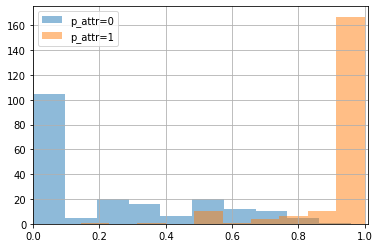

In [9]:
density_group_by_cluster(pipeline['bm_inprocessing'], group_a_train)